In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.dates as mpd
import matplotlib.pyplot as mpl

In [2]:
data = pd.read_csv("data/CH_2021_Load_Price.csv")
data.drop(columns=['Unnamed: 0'], inplace=True)

data2=pd.read_csv("data/CH_2023_Load_Price.csv")
data2.drop(columns=['Unnamed: 0'], inplace=True)
            
data=pd.concat([data, data2], axis=0)
data.reset_index(drop=True, inplace=True)

data=data.rename(columns={"xAxisValues (Unix timestamp)":"time"})
data["time"]=data['time'].astype('datetime64[ns]')

y = data["Day Ahead Auction (EUR/MWh)"]
x = data["time"]


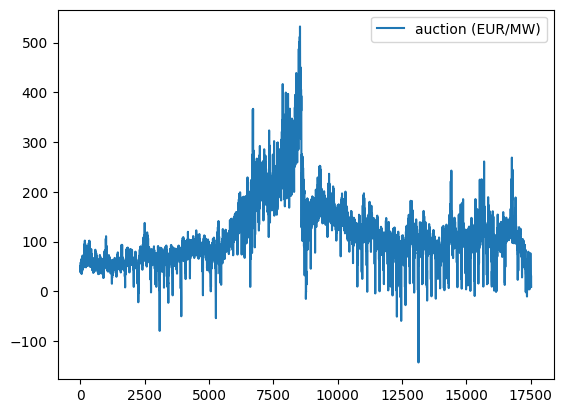

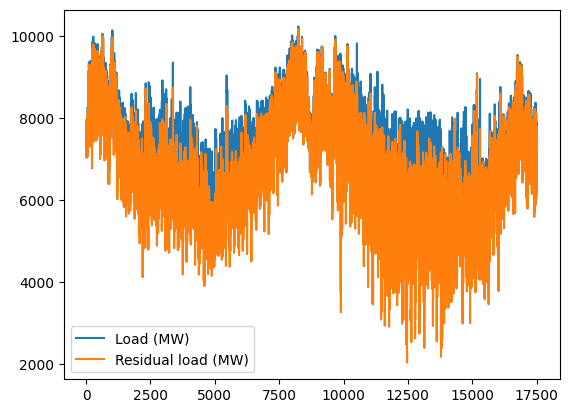

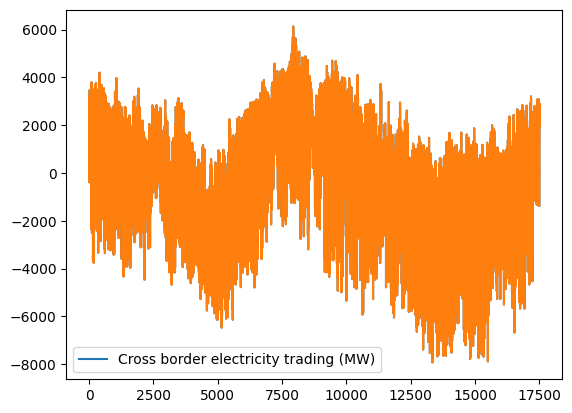

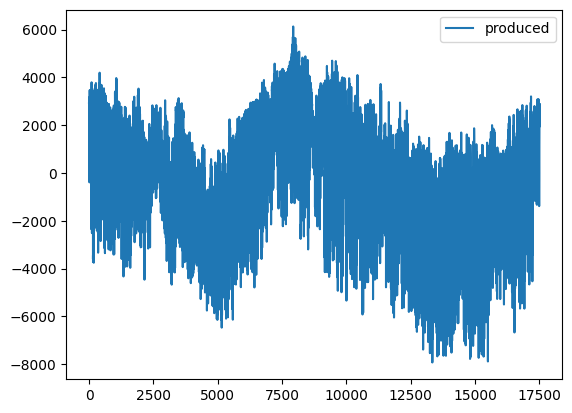

In [3]:
# plots

mpl.figure()
mpl.plot(y,label="auction (EUR/MW)")
mpl.legend()
mpl.figure()
mpl.plot(data["Load (MW)"],label="Load (MW)")
mpl.plot(data['Residual load (MW)'], label = 'Residual load (MW)')
mpl.legend()
mpl.figure()

mpl.plot(data['Cross border electricity trading (MW)'], label='Cross border electricity trading (MW)')
mpl.legend()


traded = data['Cross border electricity trading (MW)']
demand = data["Load (MW)"]+data['Residual load (MW)']
mpl.plot(data['Cross border electricity trading (MW)'], label='produced')
+data['Cross border electricity trading (MW)']*(traded<0)
mpl.figure()
mpl.plot(data['Cross border electricity trading (MW)'], label='produced')
mpl.legend()

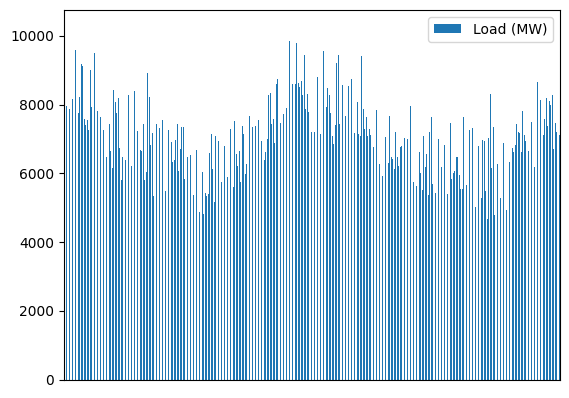

In [4]:
ax = data.plot.bar(y="Load (MW)")

ax.xaxis.set_visible(False)

In [5]:
# split the load data in hours
data.set_index("time", inplace=True)
data.loc[:,'hours'] = data.index.hour

groups = data.groupby(data.index.hour)["Load (MW)"]

df = pd.DataFrame()
for name, group in groups:
    df[f"{name}"] = pd.Series(group.values)


Text(0.5, 1.0, 'Load per Hour')

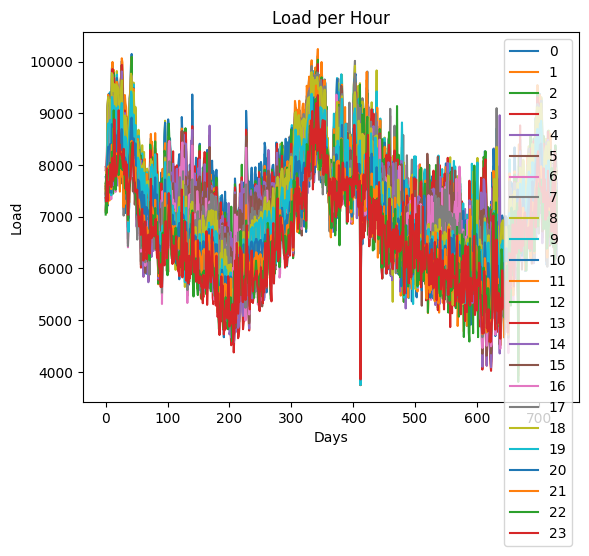

In [6]:
# Load per hours
for hour in  range(0,24):
    mpl.plot(df[f"{hour}"], label=f"{hour}")
mpl.xlabel("Days")
mpl.ylabel("Load")
mpl.legend()
mpl.title("Load per Hour")

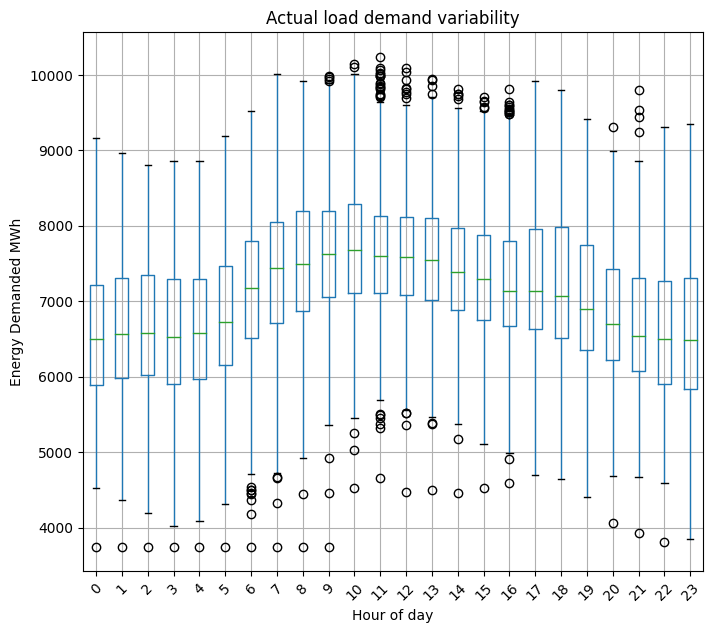

In [8]:
# load distribution box plot

import matplotlib.pyplot as plt
##https://github.com/kolasniwash/short-term-energy-demand-forecasting/blob/main/data_analysis.ipynb
fig = plt.figure(figsize=(8,7))
df.boxplot()
plt.xlabel('Hour of day')
plt.ylabel('Energy Demanded MWh')
plt.title('Actual load demand variability')
plt.xticks(rotation=45);
plt.savefig("loadDemand.png",dpi=600)

In [9]:
def barPlot(data, namefield, namepng):
    groups = data.groupby(data.index.hour)[f"{namefield}"]

    df = pd.DataFrame()
    for name, group in groups:
        df[f"{name}"] = pd.Series(group.values)
    
    ##https://github.com/kolasniwash/short-term-energy-demand-forecasting/blob/main/data_analysis.ipynb
    fig = plt.figure(figsize=(8,7))
    df.boxplot()
    plt.xlabel('Hour of day')
    plt.ylabel(f'{namefield}')
    plt.title(f'{namefield}')
    plt.xticks(rotation=45);
    plt.savefig(namepng,dpi=600)

Hydrowaterreservoir(MW).png
Hydropumpedstorage(MW).png
Windonshore(MW).png
Solar(MW).png


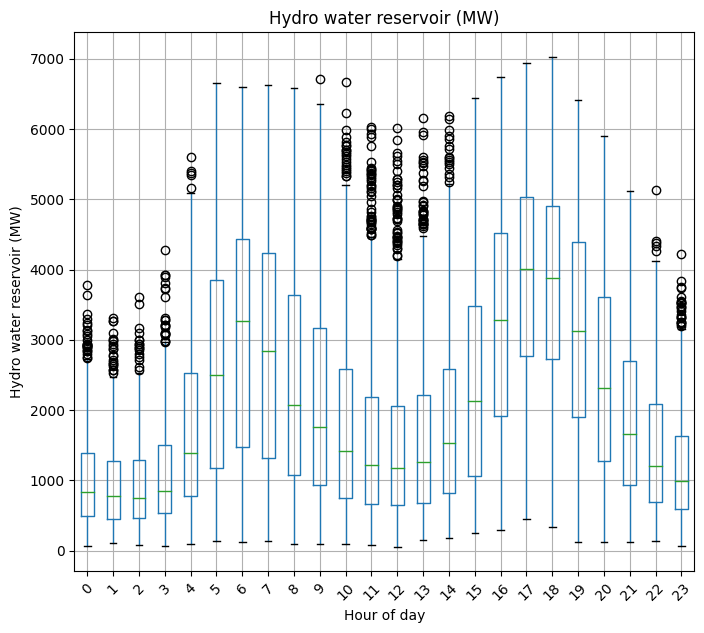

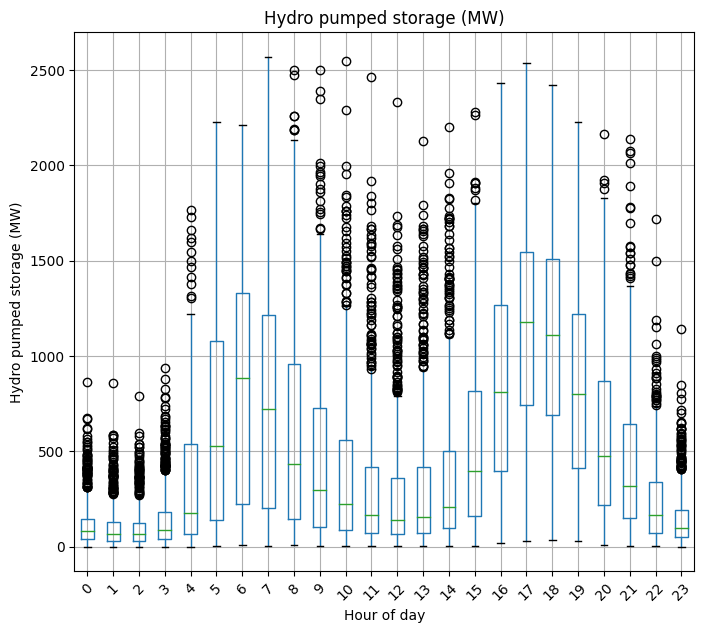

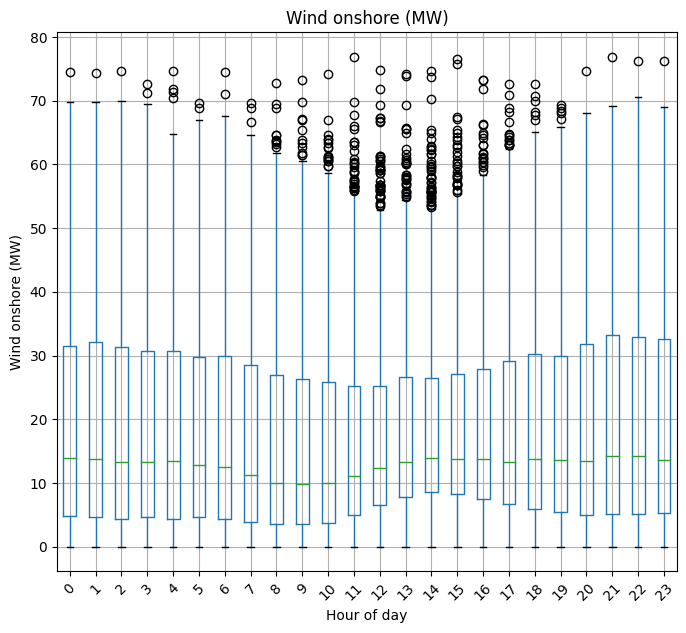

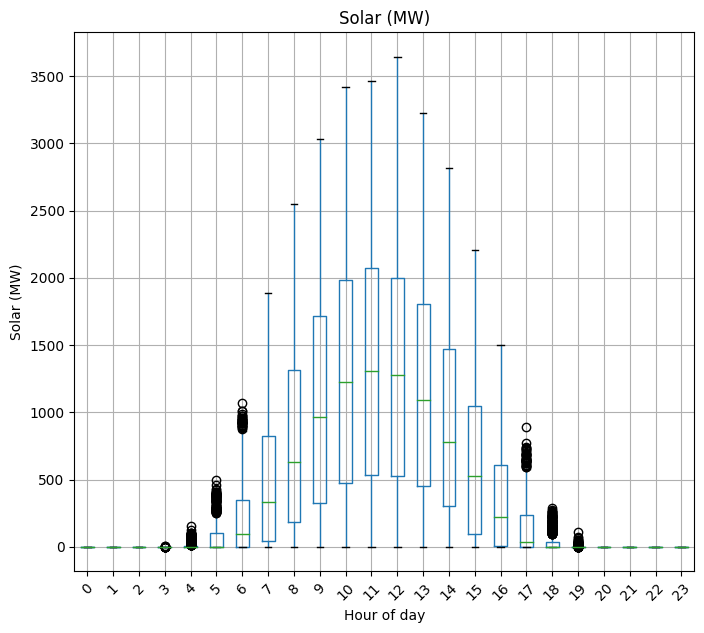

In [10]:
# plots for every energy type
import string
for key in data.keys()[3:-6]:
    keyname = f"{key}.png"
    keyname = keyname.translate({ord(c): None for c in string.whitespace})
    print(keyname)
    barPlot(data,key, f"{keyname}")

In [11]:
namefield = data.keys()[-2]
groups = data.groupby(data.index.hour)[f"{namefield}"]
keyname = f"{key}.png"
keyname = keyname.translate({ord(c): None for c in string.whitespace})

df = pd.DataFrame()
for name, group in groups:
    df[f"{name}"] = pd.Series(group.values)

fig = plt.figure(figsize=(8,7))
df.boxplot()
plt.xlabel('Hour of day')
plt.ylabel(f'{namefield}')
plt.title(f'{namefield}')
plt.xticks(rotation=45);
plt.savefig("DayAheadPrice.png",dpi=600)

In [7]:
X_train = np.zeros((df['0'].shape[0], len(df.columns)))
counter =0
for idx in df.columns:
    X_train[:,counter]= df[idx]
    counter +=1 
np.save("data_21_23.npy", X_train)